In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
dataframe = pd.read_csv('SPAM text message 20170820 - Data.csv')

In [4]:
dataframe.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
dataframe.tail()

,Category,Message
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [6]:
dataframe.shape

(5572, 2)

In [7]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [8]:
dataframe['Category'].value_counts()

Category
ham     4825
spam     747
Name: count, dtype: int64

In [9]:
dataframe.isna().sum()

Category    0
Message     0
dtype: int64

In [10]:
dataframe.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [11]:
dataframe['Category'].value_counts() / (len(dataframe))

Category
ham     0.865937
spam    0.134063
Name: count, dtype: float64

In [12]:
ham = dataframe[dataframe['Category'] == 'ham']
spam = dataframe[dataframe['Category'] == 'spam']

In [13]:
ham.shape, spam.shape

((4825, 2), (747, 2))

In [14]:
ham = ham.sample(spam.shape[0])

In [15]:
ham.shape

(747, 2)

In [16]:
ham.shape,spam.shape

((747, 2), (747, 2))

In [18]:
# Assuming 'ham' and 'spam' are two separate DataFrames
dataset = pd.concat([ham, spam], ignore_index=True)


In [19]:
dataset.shape

(1494, 2)

In [21]:
dataset["Category"].value_counts()

Category
ham     747
spam    747
Name: count, dtype: int64

In [22]:
dataset.head()

,Category,Message
0,ham,Then. You are eldest know.
1,ham,It certainly puts things into perspective when...
2,ham,I'm already back home so no probably not
3,ham,"That means you got an A in epi, she.s fine. Sh..."
4,ham,The 2 oz guy is being kinda flaky but one frie...


# Splitting the datadset

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x_train, x_test, y_train, y_test = train_test_split(dataset['Message'], 
                                                    dataset['Category'],
                                                    test_size = 0.2, 
                                                    random_state = 101, 
                                                    shuffle = True)

In [25]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1195,), (299,), (1195,), (299,))

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [27]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('classifier', RandomForestClassifier())
])

In [28]:
pipeline.fit(x_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', RandomForestClassifier())])

In [33]:
y_pred = pipeline.predict(x_test)

## Error Analysis 

In [30]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [34]:
accuracy_score = accuracy_score(y_test, y_pred)

In [35]:
accuracy_score

0.959866220735786

In [36]:
classification_report = classification_report(y_test, y_pred)

In [37]:
print(classification_report)

              precision    recall  f1-score   support

         ham       0.93      1.00      0.96       153
        spam       1.00      0.92      0.96       146

    accuracy                           0.96       299
   macro avg       0.96      0.96      0.96       299
weighted avg       0.96      0.96      0.96       299



In [39]:
confusion_matrix = confusion_matrix(y_test, y_pred)

In [40]:
confusion_matrix

array([[153,   0],
       [ 12, 134]], dtype=int64)

<Axes: >

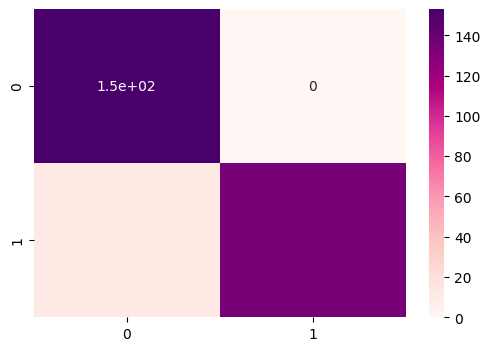

In [42]:
plt.figure(figsize = (6,4))
sns.heatmap(confusion_matrix, annot = True, cmap = "RdPu")

## Predicting

In [43]:
print(y_pred[4]), print(y_test.iloc[4])

spam
spam


(None, None)

In [44]:
print(y_pred[3]), print(y_test.iloc[3])

ham
ham


(None, None)

In [45]:
test_text_1 = ['We love OnePiece']
test_text_2 = ['Luffy will become King Of Pirates']
test_text_3 = ['Horimiya Piece is gonna break the internet']

In [46]:
print(pipeline.predict(test_text_1))
print(pipeline.predict(test_text_2))
print(pipeline.predict(test_text_3))

['ham']
['ham']
['ham']
